In [15]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns

In [17]:
api_key = 'api goes here'
channel_ids = ['UCBJycsmduvYEL83R_U4JriQ', # Marques Brownlee
               'UCYqsJbDDngvxb_rbHzHpYGA', # Magic Noah
               'UCsBjURrPoezykLs9EqgamOA', # Fireship
              ]

youtube = build('youtube', 'v3', developerKey=api_key)

## Function to get channel stats ##

In [18]:
def get_channel_stats(youtube, channel_ids):
    all_data = []
    request = youtube.channels().list(
                part='snippet,contentDetails,statistics',
                id=','.join(channel_ids))
    response = request.execute() 
    
    for i in range(len(response['items'])):
        data = dict(Channel_name = response['items'][i]['snippet']['title'],
                    Subscribers = response['items'][i]['statistics']['subscriberCount'],
                    Views = response['items'][i]['statistics']['viewCount'],
                    Total_videos = response['items'][i]['statistics']['videoCount'],
                    playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        all_data.append(data)
    
    return all_data

In [20]:
channel_statistics = get_channel_stats(youtube, channel_ids)

In [21]:
channel_data = pd.DataFrame(channel_statistics)

In [22]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,Magic The Noah,1030000,103017809,245,UUYqsJbDDngvxb_rbHzHpYGA
1,Marques Brownlee,19200000,4376117149,1673,UUBJycsmduvYEL83R_U4JriQ
2,Fireship,3210000,455411233,655,UUsBjURrPoezykLs9EqgamOA


In [23]:
channel_data['Subscribers'] = pd.to_numeric(channel_data['Subscribers'])
channel_data['Views'] = pd.to_numeric(channel_data['Views'])
channel_data['Total_videos'] = pd.to_numeric(channel_data['Total_videos'])
channel_data.dtypes

Channel_name    object
Subscribers      int64
Views            int64
Total_videos     int64
playlist_id     object
dtype: object

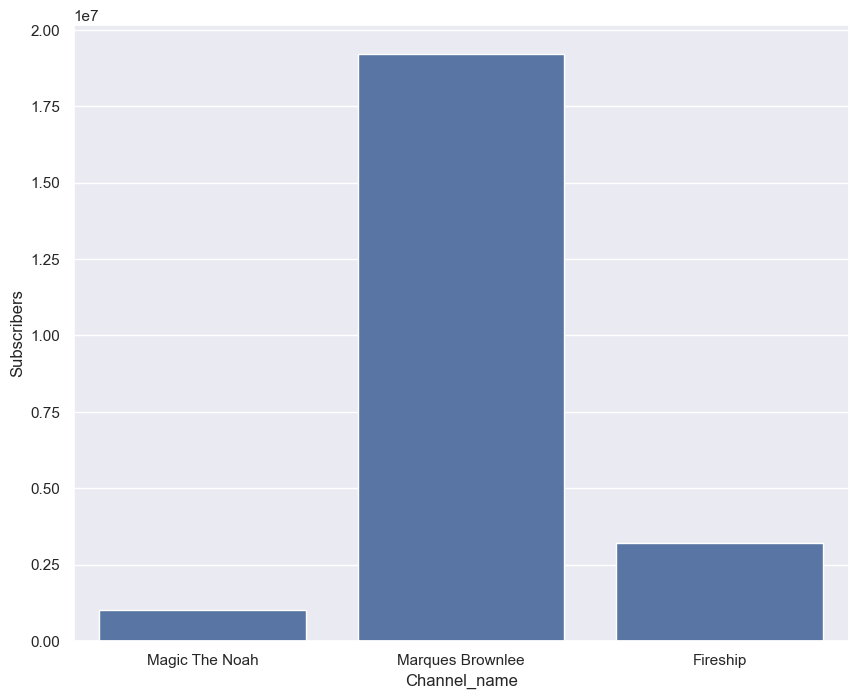

In [24]:
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.barplot(x='Channel_name', y='Subscribers', data=channel_data)

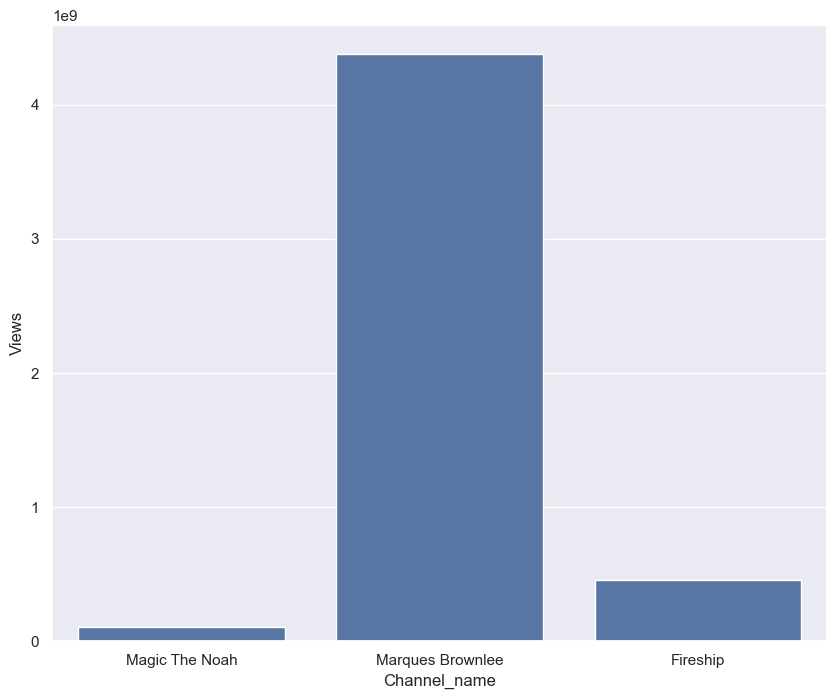

In [25]:
ax = sns.barplot(x='Channel_name', y='Views', data=channel_data)

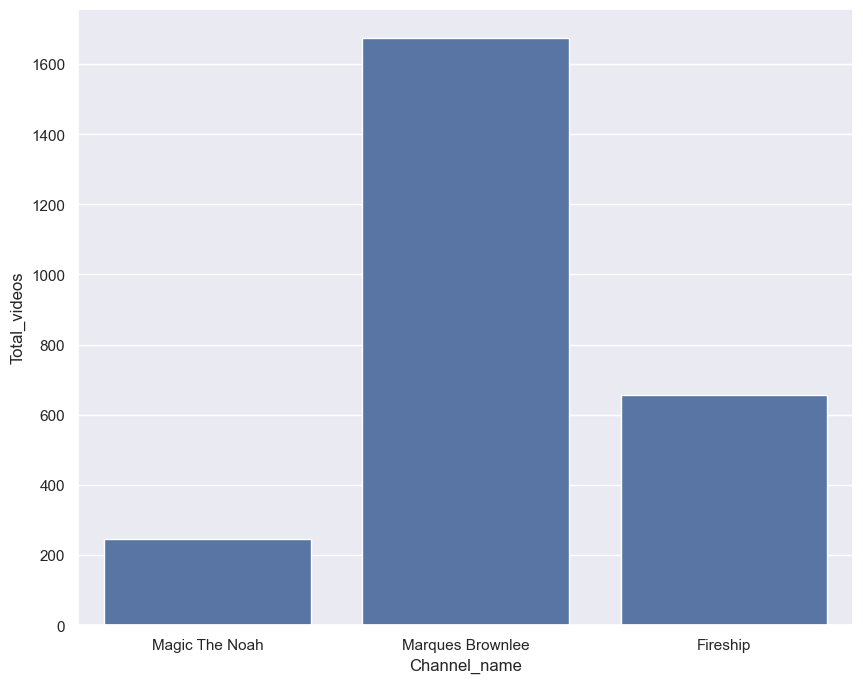

In [26]:
ax = sns.barplot(x='Channel_name', y='Total_videos', data=channel_data)

## Function to get channel Ids ##

In [27]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,Magic The Noah,1030000,103017809,245,UUYqsJbDDngvxb_rbHzHpYGA
1,Marques Brownlee,19200000,4376117149,1673,UUBJycsmduvYEL83R_U4JriQ
2,Fireship,3210000,455411233,655,UUsBjURrPoezykLs9EqgamOA


In [28]:
playlist_id = channel_data.loc[channel_data['Channel_name']=='Magic The Noah', 'playlist_id'].iloc[0]

In [29]:
def get_video_ids(youtube, playlist_id):
    
    request = youtube.playlistItems().list(
                part='contentDetails',
                playlistId = playlist_id,
                maxResults = 50)
    response = request.execute()
    
    video_ids = []
    
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
        
    next_page_token = response.get('nextPageToken')
    more_pages = True
    
    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(
                        part='contentDetails',
                        playlistId = playlist_id,
                        maxResults = 50,
                        pageToken = next_page_token)
            response = request.execute()
    
            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
            
            next_page_token = response.get('nextPageToken')
        
    return video_ids

In [30]:
video_ids = get_video_ids(youtube, playlist_id)

In [31]:
video_ids

['Q_QL5v_0ig4',
 'KrUxD7sozh4',
 'mc9EQQ8t9fA',
 'c6vzKNfPtwc',
 'v7AFedpJM0o',
 'ewoGiqs1PiM',
 'Q-9lwZTLIKA',
 'Lblg7NOwf20',
 '3hANMXy2Hmk',
 '2rdWQRWmsvw',
 'fBl2hoA9nU0',
 'EHPBcvA1esE',
 '9PNrA4-D-Xs',
 'f-e5Oflhn7c',
 'MxWMhht-jdw',
 'Te8Gbbzdaw0',
 '61gD8z4vGOw',
 'NNJcNV2AsMM',
 'C1Jwf4iv_RY',
 '7hoskMidHk4',
 'B77u8cjaYIs',
 '8Xp8317orKY',
 'QpsNJCFkFys',
 'csi_6NbcJxk',
 'fV_vgu9G7ZA',
 'D4-7w4XhThI',
 '7VMniPDc8qg',
 '5hyd7k4WZeI',
 'iUpVZ0_f6ic',
 '0cYeERv-d5A',
 'DiY2qYAkp-0',
 'vS5KXo-nAWM',
 'gE6l5gcHr7Y',
 'JW0gSZP9Bc4',
 'i3JPfy9qkxM',
 'JHjoUYXIp_w',
 'mEgsDLfvz3E',
 'nVSYl_SdZNI',
 '-4nCT1ytpao',
 '9ANsaSyvLyw',
 'IAD0acxNHTQ',
 'woyQUeVsdSs',
 'zLaMiQU2kRc',
 'bvB1bpSrrx4',
 'kfYRds7bQtk',
 '1-KpnoVrzEk',
 'QDUqNUWkUPo',
 '578YjVqS6N0',
 'NoIegLbJQxI',
 'bXsoZcoxICg',
 'TwsVl4vjJy4',
 'E17arKIadAU',
 'iP1U8Iwga1s',
 'HKRgwbJLX1s',
 'lZBNErpjGd0',
 '6SFjAwEOOaw',
 'j2TvQzwmkRI',
 '3o97cy8_5Sw',
 'rfShHIUFviI',
 '9qiaL7S0TdY',
 'D71RTHBYudM',
 'f9Z1lF_kYaE',
 'xerORo